In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("conversion_project.csv")

In [4]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [5]:
df.shape

(316200, 6)

Firstly, we examine the overall conversion rate.

In [35]:
np.mean(df.converted) * 100

3.225806451612903

We could see the overall conversion rate is 3.23%, and then we examine the distribution of conversion with regard to each variable.

Users from each source have a similar conversion rate, we could see that conversion rate of direct users is the lowest, which makes sense since they may not be well-introduced about the advantages of the product, but there may still be room for improvement.

In [16]:
source_dist = df.groupby("source").mean()
source_dist.head()

,age,new_user,total_pages_visited,converted
source,,,,
Ads,30.534742,0.685700,4.899538,0.034483
Direct,30.567978,0.686854,4.816901,0.028169
Seo,30.590835,0.684681,4.883946,0.032895


Next, we examine the age distribution.

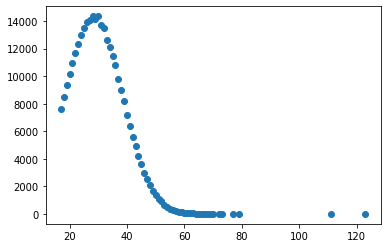

In [43]:
age_count = df.age.value_counts()
plt.scatter(age_count.index, age_count)

The number of users at each age follows a perfect normal distribution! A few outliers over 100 should be dropped.

In [44]:
df = df[df.age<100]

Then we examine how the age variable affects the conversion rate.

In [15]:
age_dist = df.groupby("age").mean()
age_dist.head()

,new_user,total_pages_visited,converted
age,,,
17,0.667500,5.317362,0.071607
18,0.672336,5.184266,0.066029
19,0.675794,5.108996,0.058616
20,0.675266,5.129874,0.057109
21,0.679920,5.068028,0.053985


In [27]:
age_dist.index

Int64Index([ 17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
             30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
             43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
             56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
             69,  70,  72,  73,  77,  79, 111, 123],
           dtype='int64', name='age')

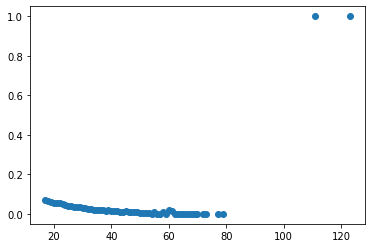

In [33]:
plt.scatter(age_dist.index,age_dist["converted"])

Roughly, as age goes up, the conversion rate goes down gradually.

Next, we examine the new_user variable. We could see that new users have a conversion rate of 1.4%, while old users have a conversion rate of 7.2%

In [14]:
user_dist = df.groupby("new_user").mean()
user_dist

,age,total_pages_visited,converted
new_user,,,
0,30.419140,5.280084,0.072002
1,30.639017,4.686155,0.014021


In [19]:
page_dist = df.groupby("total_pages_visited").mean()
page_dist.head()

,age,new_user,converted
total_pages_visited,,,
1,30.711701,0.703601,0.000000
2,30.701673,0.699188,0.000228
3,30.690251,0.699035,0.000251
4,30.729572,0.696730,0.000780
5,30.629476,0.694475,0.001570


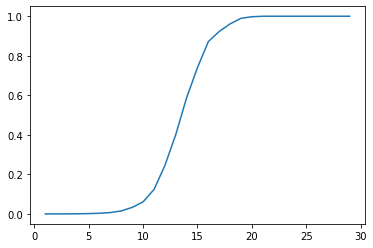

In [25]:
plt.plot(page_dist.converted)

Finally we check the distribution of the coutries, we could see that China has an incredibly low conversion rate, which is weird.

In [21]:
country_dist = df.groupby("country").mean()
country_dist

,age,new_user,total_pages_visited,converted
country,,,,
China,30.672972,0.698520,4.553523,0.001332
Germany,30.449985,0.677237,5.190717,0.062500
UK,30.451538,0.679835,5.082167,0.052632
US,30.566482,0.681985,4.930160,0.037801
